In [7]:
# AF5 - Procesamiento de datos
# Autores: [Luis Daniel Aguilar Miranda 2041473, Melenie Azeneth Domínguez González 2053928, Luis Antonio Pérez Espinoza 2052196, Elizabeth Spinoso Castillo 2057039, Diana Sánchez Arévalo 2173882]
# Hora de clase: [N4]

print("AF5 - Procesamiento de datos\nAutores: [Luis Daniel Aguilar Miranda, Melenie Azeneth Domínguez González, Luis Antonio Pérez Espinoza, Elizabeth Spinoso Castillo , Diana Sánchez Arévalo ]")

AF5 - Procesamiento de datos
Autores: [Luis Daniel Aguilar Miranda, Melenie Azeneth Domínguez González, Luis Antonio Pérez Espinoza, Elizabeth Spinoso Castillo , Diana Sánchez Arévalo ]


In [8]:
import pandas as pd


In [9]:
url = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv"
df = pd.read_csv(url)

# Mostrar primeras filas
df.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


In [10]:
# Información general
df.info()

# Valores estadísticos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
count,1000.000000,970.000000,970.000000,970.000000
mean,499.500000,54.011809,25.203708,27.518110
std,288.819436,26.408040,14.632979,4.386129
min,0.000000,10.416882,0.160913,20.000175
25%,249.750000,30.581348,11.877176,23.890799
50%,499.500000,54.633590,25.874517,27.507535
75%,749.250000,76.891589,37.989158,31.409083
max,999.000000,99.974591,49.970686,34.967313


In [11]:
# Eliminar filas con valores nulos
df_clean = df.dropna()

# Eliminar valores atípicos (ejemplo: velocidad negativa)
df_clean = df_clean[df_clean["Velocidad (cm/s)"] >= 0]

df_clean.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


In [12]:
df_clean.isnull().sum()

,0
Tiempo (s),0
Distancia (cm),0
Velocidad (cm/s),0
Temperatura (°C),0


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizamos solo las columnas numéricas
cols = ["Tiempo (s)", "Distancia (cm)", "Velocidad (cm/s)", "Temperatura (°C)"]
df_norm = pd.DataFrame(scaler.fit_transform(df_clean[cols]), columns=cols)

df_norm.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0.000000,0.371735,0.182609,0.262269
1,0.001001,0.950755,0.540740,0.247509
2,0.002002,0.730954,0.873049,0.908233
3,0.003003,0.596960,0.731791,0.250082
4,0.004004,0.152134,0.806411,0.272535


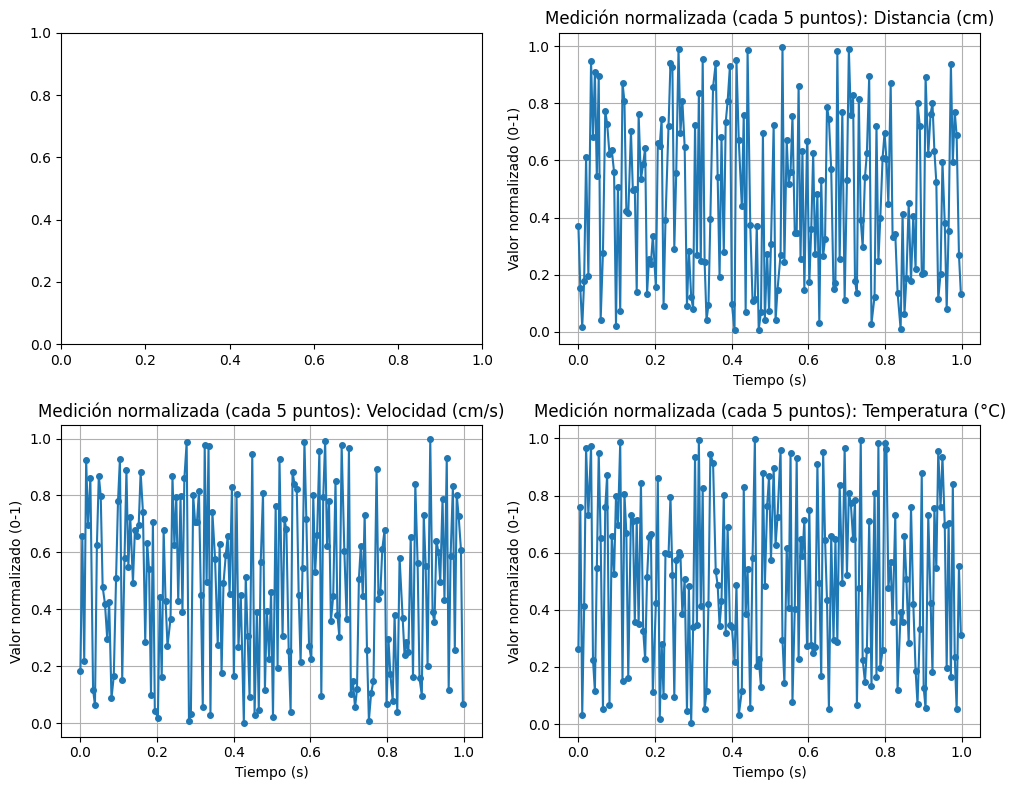

In [20]:
import matplotlib.pyplot as plt

# Crear subplots en cuadrícula 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# Graficar cada columna contra el tiempo con muestreo
for i, col in enumerate(df_norm.columns):
    if col != "Tiempo (s)":  # Evitar graficar el tiempo contra sí mismo
        axs[i].plot(df_norm["Tiempo (s)"][::5], df_norm[col][::5],
                    marker='o', linestyle='-', markersize=4)
        axs[i].set_title(f"Medición normalizada (cada 5 puntos): {col}")
        axs[i].set_xlabel("Tiempo (s)")
        axs[i].set_ylabel("Valor normalizado (0-1)")
        axs[i].grid(True)

plt.tight_layout()
plt.show()
